In [413]:
import sys
import importlib
import pandas as pd
sys.path.append('../lib')

import autograd_convenience as co
import autograd_plot as plots
import story

importlib.reload(co)
importlib.reload(plots)
importlib.reload(story)

<module 'story' from '/home/jupyter/pensjon-data-analyse/lib/story.py'>

In [414]:
df_file = pd.read_csv("../data/Totalrapport_02232022.csv").drop('Unnamed: 8', axis=1)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.



In [415]:
df_file.Stønadsområde.value_counts()

Alderspensjon          123369
Uføretrygd              91953
AFP Privat              50294
Gjenlevendeytelse       14010
Barnepensjon            10877
AFP                      8652
Krigspensjon              555
Familiepleierytelse       213
Gammel yrkesskade         131
Ukjent                     13
Name: Stønadsområde, dtype: int64

In [416]:
ytelse = "Alderspensjon"
df = co.prepare_df(df_file, ytelse)

Fjerner rader opprettet av batch, og beholder kun førstegangsbehandling innenfor Alderspensjon. 

Antall rader totalt: 300067
Antall rader ikke opprettet av batch: 270682
Antall rader førstegangsbehandling: 254868
Antall rader for Alderspensjon: 111933

Summerer antall innkomne saker gruppert på ["År-måned", "Selvbetjening", "Automatiseringsgrad", "Utenlandstilsnitt"]
Regner ut totalt antall saker per måned og andel per gruppering
Antall rader etter gruppering: 154


In [417]:
df.head(12)

,År-måned,Selvbetjening,Automatiseringsgrad,Utenlandstilsnitt,Antall innkomne saker,Antall innkomne saker totalt,Andel
0,2021 01,Ikke selvbetjent,Automatisk,Nasjonal,57,5292,0.010771
1,2021 01,Ikke selvbetjent,Automatisk,Utland,2,5292,0.000378
2,2021 01,Ikke selvbetjent,Del-automatisk,Nasjonal,2,5292,0.000378
3,2021 01,Ikke selvbetjent,Del-automatisk,Utland,0,5292,0.000000
4,2021 01,Ikke selvbetjent,Manuell,Nasjonal,233,5292,0.044029
5,2021 01,Ikke selvbetjent,Manuell,Utland,598,5292,0.113001
6,2021 01,Selvbetjent,Automatisk,Nasjonal,2525,5292,0.477135
7,2021 01,Selvbetjent,Automatisk,Utland,24,5292,0.004535
8,2021 01,Selvbetjent,Del-automatisk,Nasjonal,394,5292,0.074452
9,2021 01,Selvbetjent,Del-automatisk,Utland,350,5292,0.066138


In [418]:
autogroups = ["År-måned", "Automatiseringsgrad"]
selvgroups = ["År-måned", "Selvbetjening"]

# Filtre som funker på df
_selvbetjent = df["Selvbetjening"] == "Selvbetjent"
_innland = df["Utenlandstilsnitt"] == "Nasjonal"
_auto = df["Automatiseringsgrad"] == "Automatisk"
_all = df["Andel"] < 2 #Hardkodet alle rader

In [419]:
figs = {}

In [420]:
df["Automatiseringsgrad"]

0          Automatisk
1          Automatisk
2      Del-automatisk
3      Del-automatisk
4             Manuell
            ...      
149        Automatisk
150    Del-automatisk
151    Del-automatisk
152           Manuell
153           Manuell
Name: Automatiseringsgrad, Length: 154, dtype: object

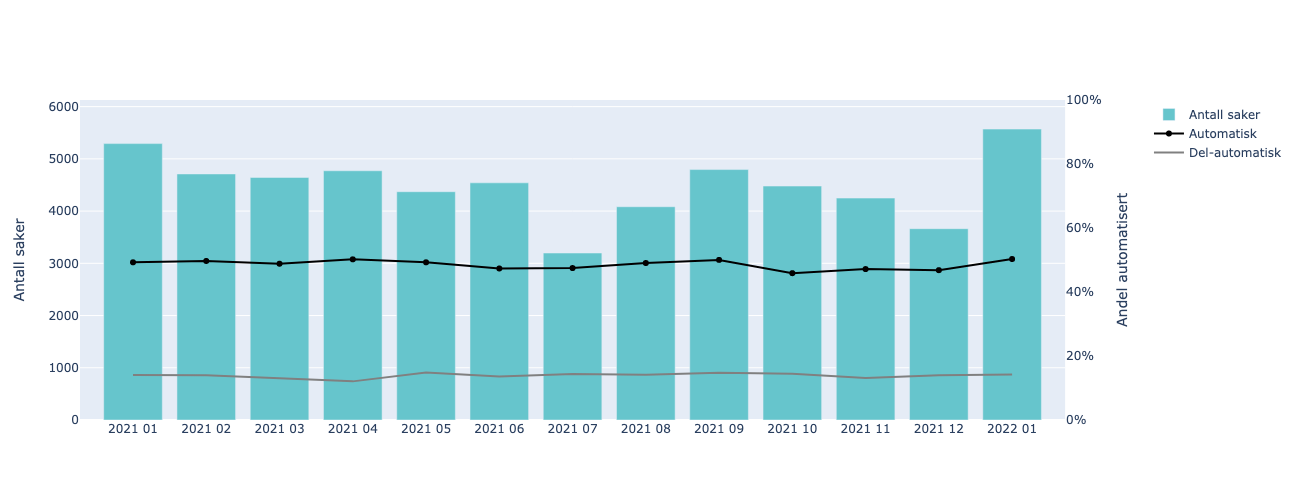

In [421]:
if df['Automatiseringsgrad'].str.contains('Automatisk').any():
    figs["auto_total"] = plots.plot_automatisering1(co.sharpen_df(df, _all, autogroups))
    figs["auto_total"].show()

    auto_selv_list = [[co.sharpen_df(df, _selvbetjent, autogroups), co.sharpen_df(df, ~_selvbetjent, autogroups)]]
    titles = ['Selvbetjent', 'Ikke selvbetjent']
    figs["auto_selv"] = plots.plot_automatisering_subplots(auto_selv_list, titles)

    auto_utland_list = [[co.sharpen_df(df, _innland, autogroups), co.sharpen_df(df, ~_innland, autogroups)]]
    titles = ["Innland", "Utland"]
    figs["auto_utland"] = plots.plot_automatisering_subplots(auto_utland_list, titles)

In [422]:
if df['Selvbetjening'].str.contains('Selvbetjent').any():

    figs["selv_total"] = plots.plot_selvbetjening1(co.sharpen_df(df, _all, selvgroups))

    selv_utland_list = [[co.sharpen_df(df, _innland, selvgroups), co.sharpen_df(df, ~_innland, selvgroups)]]
    titles = ["Innland", "Utland"]
    figs["selv_utland"] = plots.plot_selvbetjening_subplots(selv_utland_list, titles)

auto_total


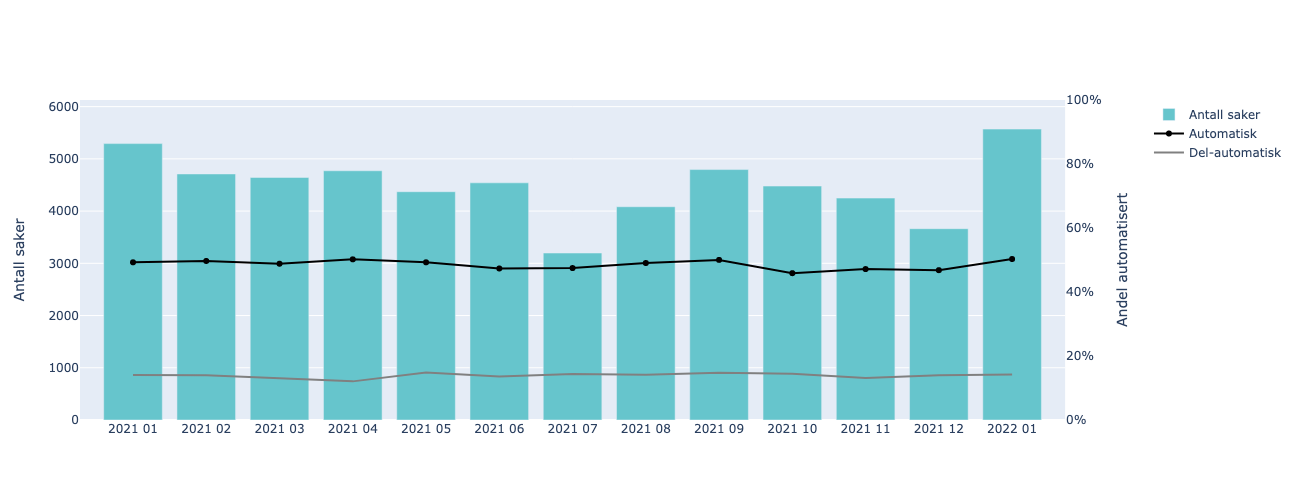

auto_selv


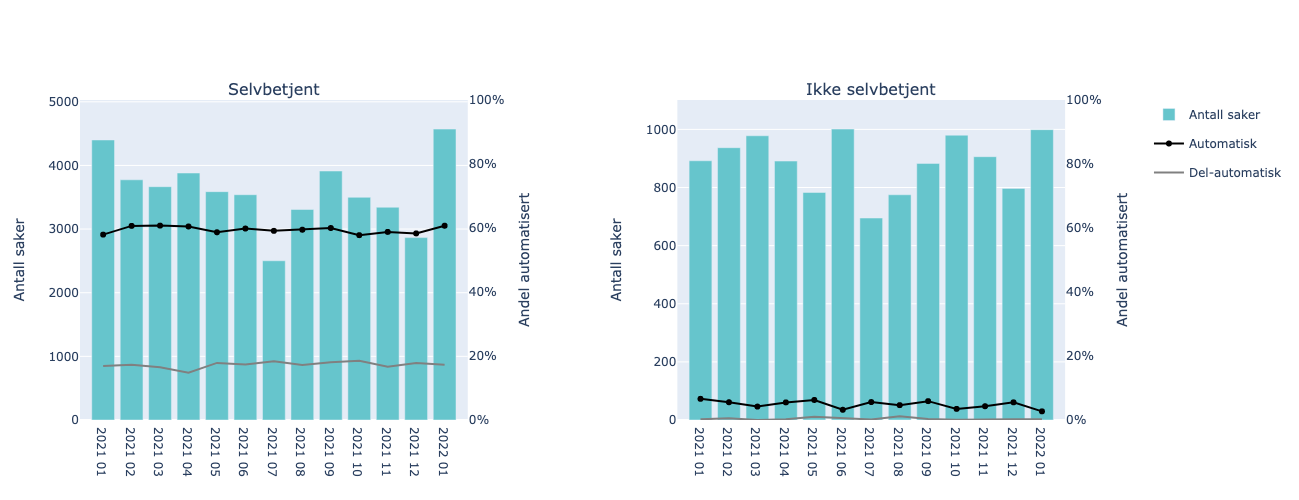

auto_utland


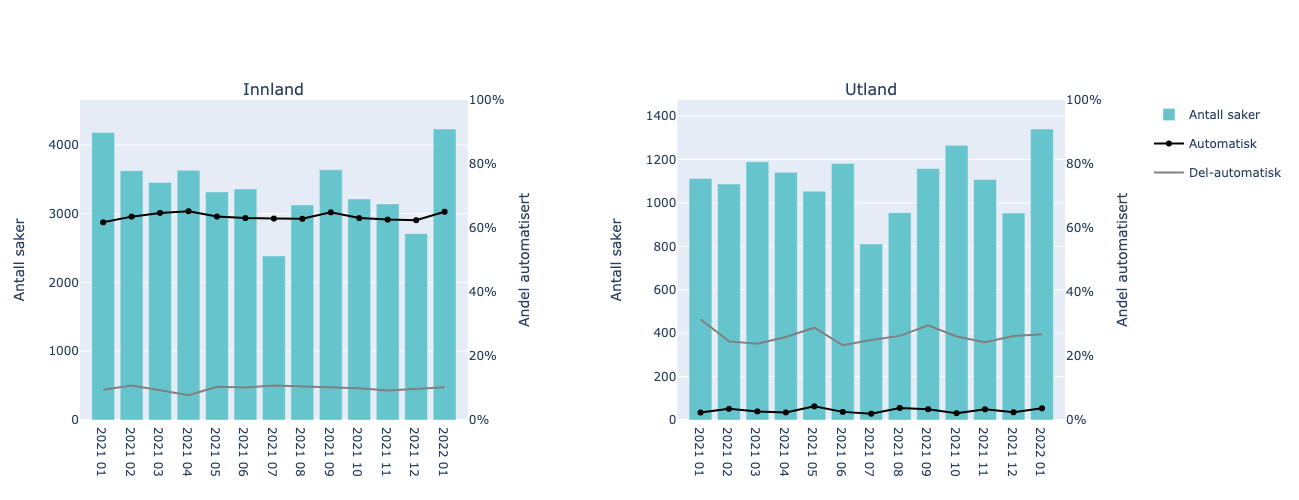

selv_total


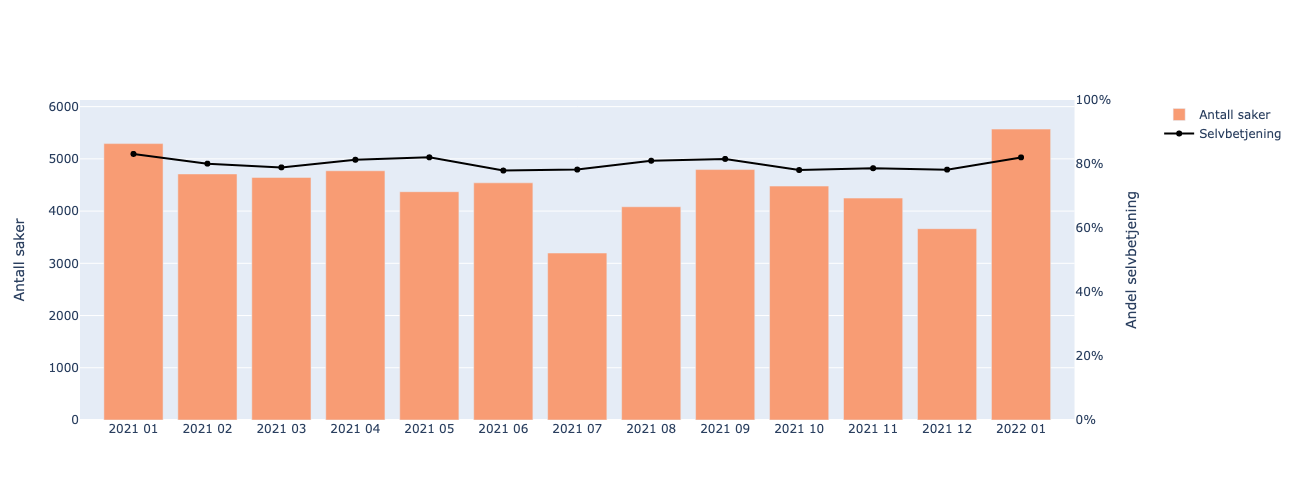

selv_utland


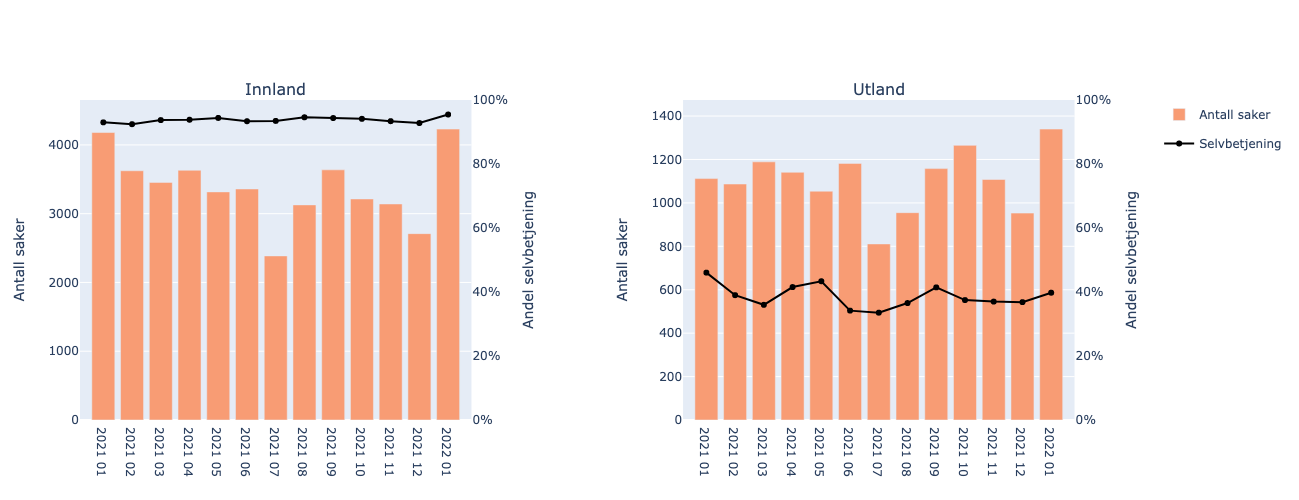

In [423]:
for key, value in figs.items():
    print(key)
    value.show()

In [426]:
innledning = f"Statistikk på automatiserings- og selvbetjeningsgrad for førstegangsbehandling av {ytelse} i pesys. Data er basert på rapporten PSAK120. Saker opprettet av batch er eksludert."
ds = story.make_datastory(ytelse, figs, innledning)

In [428]:
#ds.publish(url="https://nada.ekstern.dev.nav.no/api") #dev
ds.publish(url="https://nada.intern.nav.no/api") #prod
#ds.update(url="https://nada.ekstern.dev.nav.no/api", token='7f3503bd-f54c-4d56-b222-6ca461213527')
#ds.update(url="https://nada.intern.nav.no/api", token='77e7eb36-5a5b-4a9e-b6f9-ccee1c5db2e3')

'https://data.intern.nav.no/story/b8d45a94-3991-4676-af08-cad8e5b2ef13'